# RQ3 - Do macro-level shocks (e.g., Fed decisions) or firm-level shocks affect retail attention and market activity in Taiwan’s ETF sector?

As part of our market research project, we explore whether macro-level events—such as U.S. Federal Reserve policy announcements and high-profile public appearances (e.g., NVIDIA CEO Jensen Huang’s visit to Taiwan)—lead to detectable changes in retail investor behavior. Specifically, we investigate whether such events trigger shifts in retail search interest (proxied by thematic Google Trends attention indexes) and trading activity in selected ETFs or sectors. By comparing periods before, during, and after each event, we aim to uncover systematic behavioral responses in both attention and market participation. These insights can help clarify whether external shocks reliably activate retail investor engagement—valuable knowledge for media strategy, investor relations, and anticipating retail sentiment dynamics.

#### Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import yfinance as yf

df = pd.read_excel("merged.xlsx")
# 修正未命名的第一欄為 'date'
if df.columns[0].startswith("Unnamed"):
    df.rename(columns={df.columns[0]: "date"}, inplace=True)

## Analyzing Attention Shifts During Fed Announcement Weeks

To evaluate whether U.S. Federal Reserve policy announcements meaningfully shift investor attention, we analyze Google Trends–based attention indexes during weeks that coincide with Fed interest rate decisions. By comparing these attention levels across Fed and non-Fed weeks, we assess whether such macroeconomic events lead to observable increases in public search behavior across thematic investment categories. We use boxplots for visual distributional comparison and independent t-tests to identify statistically significant differences. This analysis helps clarify whether central bank signals draw heightened retail awareness, providing insight into the sensitivity of retail sentiment to macro-level monetary policy events.

The results show mixed evidence regarding attention shifts during Fed announcement weeks. Among the six thematic attention indexes, only the Macro_Attention_Index demonstrates a statistically significant increase during Fed weeks (p = 0.0169), suggesting that investors may indeed become more focused on macroeconomic themes in anticipation of central bank policy changes. Other indexes, including those related to ETFs, stocks, dividends, and technology, show no statistically significant changes. This implies that while macro-level monetary signals may capture investor interest on broad economic topics, they do not consistently influence sector-specific attention. These findings highlight the selective nature of retail attention responses and underscore the importance of using multiple indicators when assessing investor sentiment toward macroeconomic events.

#### Code

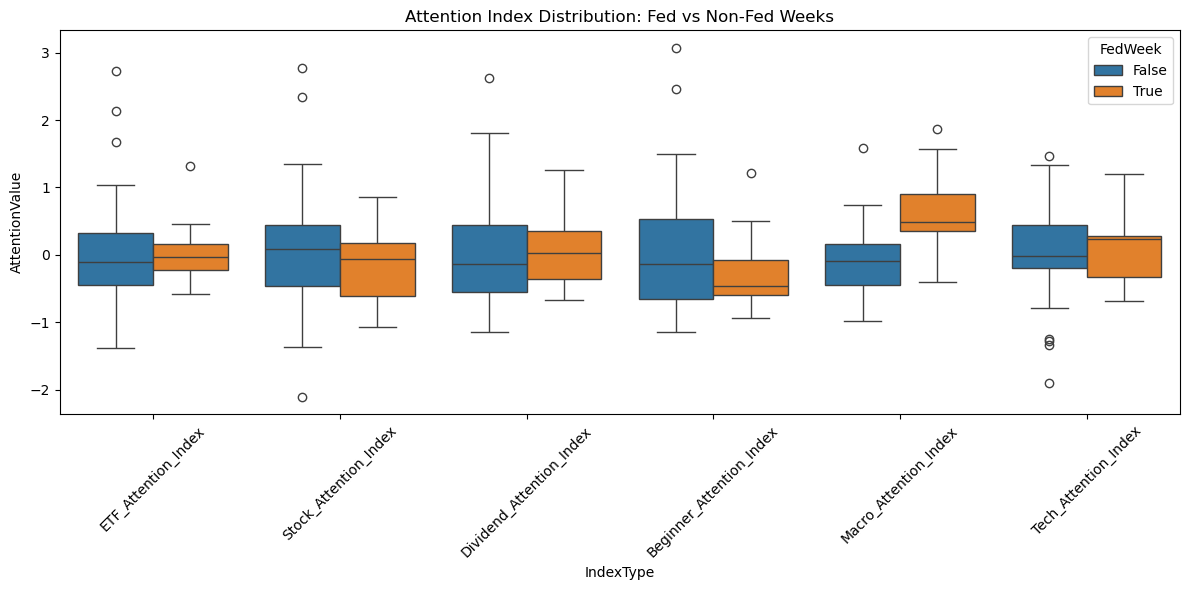

In [2]:
# Melt data for seaborn boxplot

# 建立 Fed 公布利率決策的日期清單
fed_dates = pd.to_datetime([
    '2024-01-31', '2024-03-20', '2024-05-01', '2024-06-12',
    '2024-07-31', '2024-09-18', '2024-11-06', '2024-12-18'
])

# 建立 FedWeek 標籤（Fed 事件所在週）
df['FedWeek'] = df['date'].apply(lambda x: any((x >= d - pd.Timedelta(days=3)) and (x <= d + pd.Timedelta(days=3)) for d in fed_dates))


melted = df.reset_index().melt(id_vars=['date', 'FedWeek'], 
                               value_vars=[col for col in df.columns if col.endswith('_Attention_Index')],
                               var_name='IndexType', value_name='AttentionValue')

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x='IndexType', y='AttentionValue', hue='FedWeek')
plt.title("Attention Index Distribution: Fed vs Non-Fed Weeks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
from scipy.stats import ttest_ind

# 對每個 attention index 做 t-test
for col in df.columns:
    if col.endswith('_Attention_Index'):
        fedweek = df[df['FedWeek']][col]
        non_fedweek = df[~df['FedWeek']][col]
        stat, pval = ttest_ind(fedweek, non_fedweek, equal_var=False)
        print(f"{col}: p-value = {pval:.4f}")

ETF_Attention_Index: p-value = 0.7964
Stock_Attention_Index: p-value = 0.4752
Dividend_Attention_Index: p-value = 0.7497
Beginner_Attention_Index: p-value = 0.3803
Macro_Attention_Index: p-value = 0.0169
Tech_Attention_Index: p-value = 0.6987


## Trading Volume Behavior Around Fed Announcement Weeks
To investigate whether actual trading activity mirrors investor attention in response to macroeconomic news, we analyze ETF trading volume patterns around Federal Reserve policy announcement weeks. Building on our earlier examination of attention index movements, we now assess whether shifts in trading behavior occur during the same event windows. By comparing normalized trading volumes during Fed weeks and non-Fed weeks, and applying statistical tests to evaluate their differences, this analysis helps determine whether retail trading activity exhibits measurable sensitivity to macro-level policy signals. This approach offers a more grounded perspective on market reactions—tracking not just what investors are searching for, but what they actually do.

The analysis of trading volume around Federal Reserve announcement weeks reveals limited evidence of statistically significant changes across the ETF universe. None of the examined tickers exhibit a p-value below the conventional 5% threshold, and most exceed even more relaxed significance levels. These results suggest that, unlike attention-based signals which showed more noticeable shifts, actual trading activity during Fed weeks remains relatively stable. This may indicate that retail investors are not reacting in aggregate through trade execution, or that institutional participants dominate volume to a degree that masks any attention-induced behavioral shifts. Overall, this finding underscores the importance of distinguishing between expressed interest (e.g., search activity) and realized market behavior, and highlights the limits of macro policy events in triggering broad-based volume responses in Taiwan’s ETF market.

#### Code

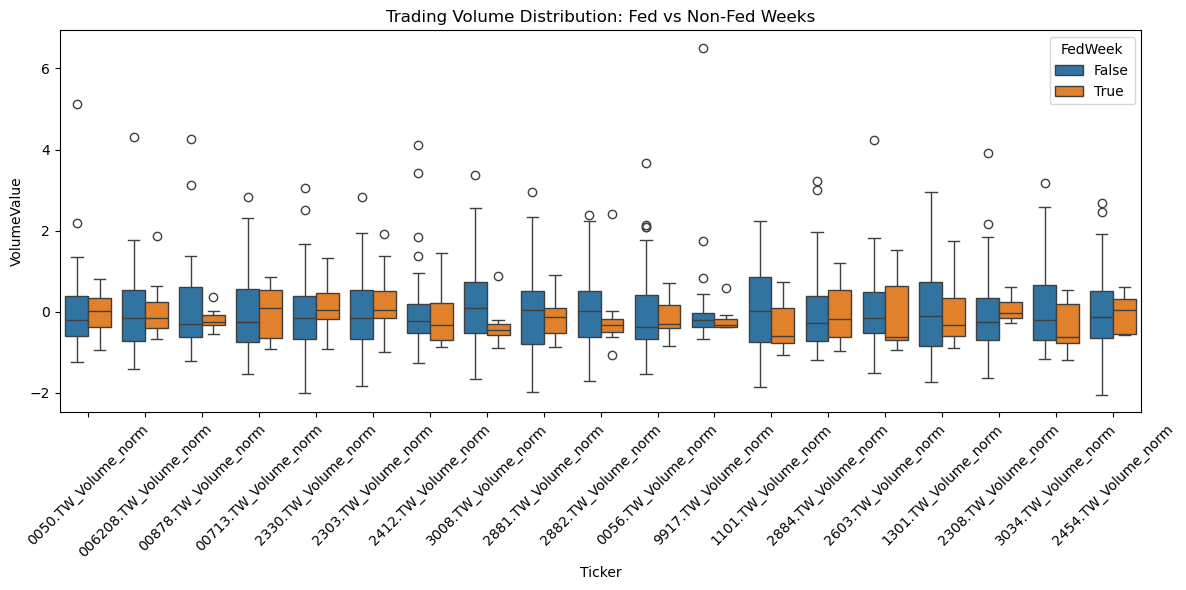

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Select normalized volume columns
volume_cols = [col for col in df.columns if 'Volume_norm' in col]

# Melt for boxplot
melted_vol = df.reset_index().melt(
    id_vars=['date', 'FedWeek'],
    value_vars=volume_cols,
    var_name='Ticker',
    value_name='VolumeValue'
)

# Plot boxplot: Volume during Fed vs Non-Fed weeks
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_vol, x='Ticker', y='VolumeValue', hue='FedWeek')
plt.title("Trading Volume Distribution: Fed vs Non-Fed Weeks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# T-test: Volume during Fed vs Non-Fed weeks
print("T-tests for Volume by Ticker:")
for col in volume_cols:
    fedweek_vol = df[df['FedWeek']][col]
    non_fed_vol = df[~df['FedWeek']][col]
    stat, pval = ttest_ind(fedweek_vol, non_fed_vol, equal_var=False)
    print(f"{col}: p-value = {pval:.4f}")

T-tests for Volume by Ticker:
0050.TW_Volume_norm: p-value = 0.8185
006208.TW_Volume_norm: p-value = 0.7870
00878.TW_Volume_norm: p-value = 0.1984
00713.TW_Volume_norm: p-value = 0.8919
2330.TW_Volume_norm: p-value = 0.7298
2303.TW_Volume_norm: p-value = 0.4941
2412.TW_Volume_norm: p-value = 0.6533
3008.TW_Volume_norm: p-value = 0.0880
2881.TW_Volume_norm: p-value = 0.5375
2882.TW_Volume_norm: p-value = 0.7632
0056.TW_Volume_norm: p-value = 0.5288
9917.TW_Volume_norm: p-value = 0.3014
1101.TW_Volume_norm: p-value = 0.1209
2884.TW_Volume_norm: p-value = 0.8270
2603.TW_Volume_norm: p-value = 0.6663
1301.TW_Volume_norm: p-value = 0.9205
2308.TW_Volume_norm: p-value = 0.9049
3034.TW_Volume_norm: p-value = 0.1193
2454.TW_Volume_norm: p-value = 0.7193


## Investigating Retail Investor Behavior During “Jensen Week”: A Firm-Specific Event Lens

To extend our macro-level analysis, we next examine a major firm-specific event: NVIDIA CEO Jensen Huang’s high-profile visit to Taiwan. Garnering extensive media coverage, the event may have influenced investor attention and trading behavior—especially within tech-oriented and semiconductor-related ETFs. This section investigates whether retail sentiment (captured via Google Trends–based attention indexes) and actual trading volumes exhibited notable shifts during the three-week window surrounding the visit. By comparing pre-event, event-week, and post-event activity, we aim to detect whether publicity-driven firm exposure can significantly shape investor engagement. This helps assess the market's sensitivity to corporate presence and firm-specific narrative momentum, providing insight into how publicity events impact both sentiment signals and real capital flows.

The results from Jensen Week analysis reveal a notable divergence between attention shifts and trading activity. While most attention indexes did not exhibit statistically significant changes, the Beginner_Attention_Index stands out with a meaningful increase, indicating that less experienced investors may have been particularly responsive to the media coverage surrounding Jensen Huang’s visit. On the other hand, trading volume data shows a broader and more consistent pattern of significant increases across a wide range of ETF tickers, especially those related to semiconductors and technology. This suggests that market participants—possibly institutional or algorithmic—acted decisively in response to perceived signals during the event window. The discrepancy between attention and trading responses emphasizes the value of analyzing both sentiment and behavior: attention signals can reveal where interest is concentrated, while volume changes reflect concrete market engagement. Together, they provide a more complete view of how macro-level publicity events shape retail market dynamics.

#### Code

In [9]:
# 讀取資料（請先確認檔案存在，或換成你的實際檔名）
df = pd.read_excel("merged.xlsx")
# 修正未命名的第一欄為 'date'
if df.columns[0].startswith("Unnamed"):
    df.rename(columns={df.columns[0]: "date"}, inplace=True)
# 將日期欄轉換為 datetime 格式
df['date'] = pd.to_datetime(df['date'])

# 定義 Jensen Huang 到訪週的日期（以實際日期為準，這裡假設為 2024-05-22）
jensen_date = pd.to_datetime("2024-05-22")

# 建立 Jensen Week 標籤：前後三週（含本週）視為 True，其餘為 False
df['JensenWeek'] = df['date'].apply(lambda x: abs((x - jensen_date).days) <= 21)

# 檢查結果
df[['date', 'JensenWeek']].head(10)

,date,JensenWeek
0,2024-01-07,False
1,2024-01-14,False
2,2024-01-21,False
3,2024-01-28,False
4,2024-02-04,False
5,2024-02-11,False
6,2024-02-18,False
7,2024-02-25,False
8,2024-03-03,False
9,2024-03-10,False


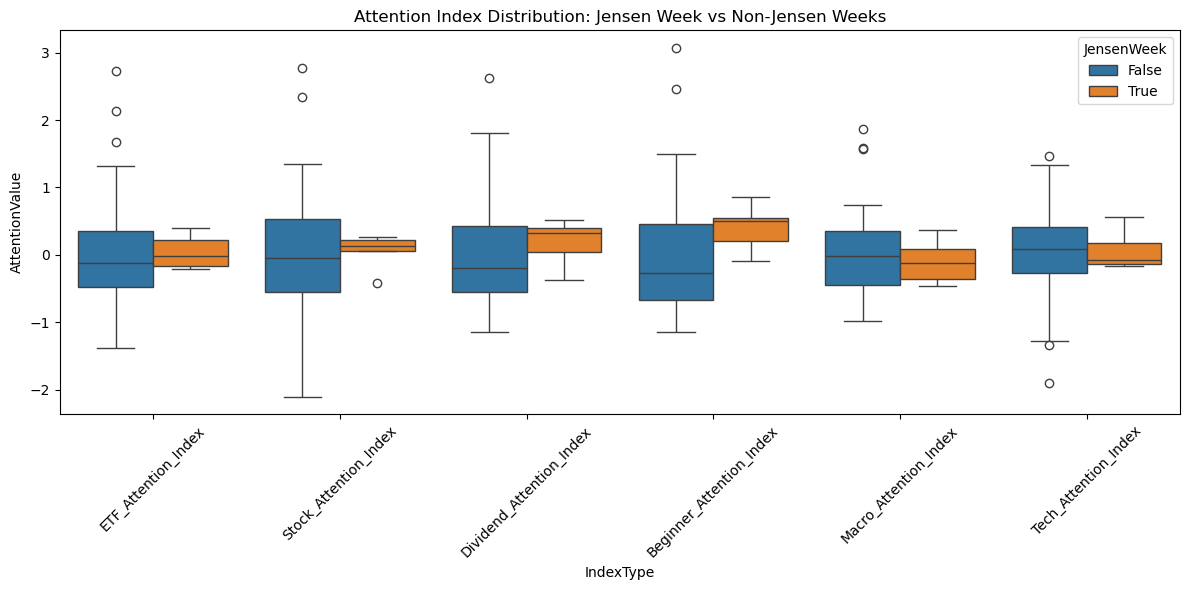

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 將注意力欄位攤平成長格式
melted_jensen = df.melt(id_vars=['date', 'JensenWeek'],
                        value_vars=[col for col in df.columns if col.endswith('_Attention_Index')],
                        var_name='IndexType',
                        value_name='AttentionValue')

# 繪製 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_jensen, x='IndexType', y='AttentionValue', hue='JensenWeek')
plt.title("Attention Index Distribution: Jensen Week vs Non-Jensen Weeks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import ttest_ind

# 針對每個 Attention Index 執行獨立樣本 t-test
for col in df.columns:
    if col.endswith('_Attention_Index'):
        jensen = df[df['JensenWeek']][col]
        non_jensen = df[~df['JensenWeek']][col]
        stat, pval = ttest_ind(jensen, non_jensen, equal_var=False)
        print(f"{col}: p-value = {pval:.4f}")

ETF_Attention_Index: p-value = 0.8664
Stock_Attention_Index: p-value = 0.7969
Dividend_Attention_Index: p-value = 0.2507
Beginner_Attention_Index: p-value = 0.0321
Macro_Attention_Index: p-value = 0.4664
Tech_Attention_Index: p-value = 0.7408


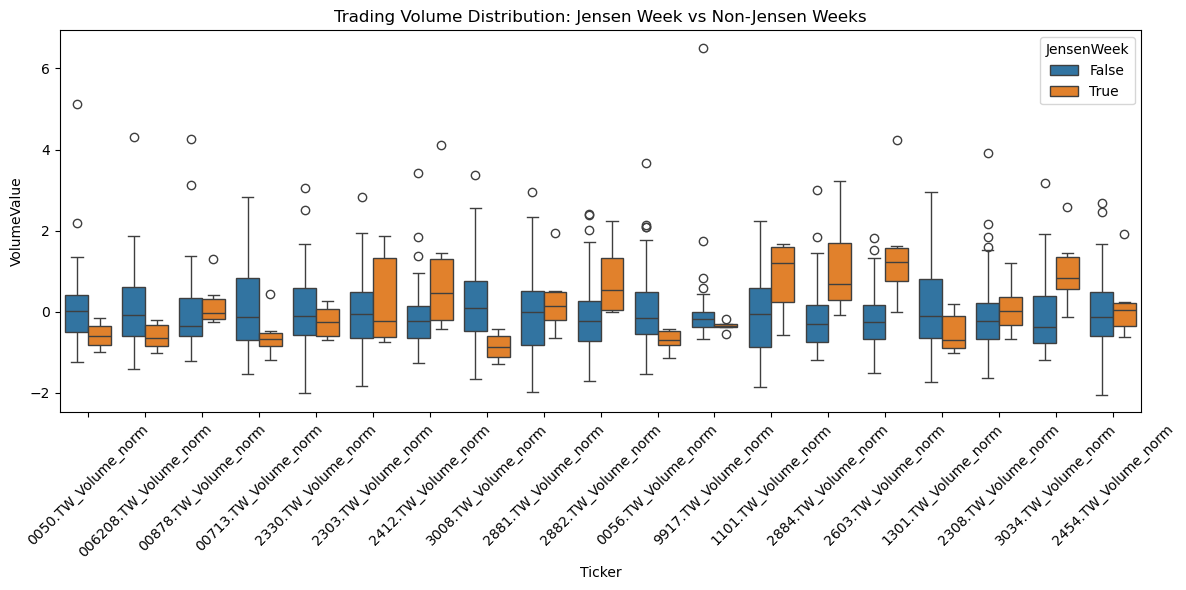

In [12]:
# 攤平成長格式
volume_cols = [col for col in df.columns if 'Volume_norm' in col]

melted_vol = df.melt(id_vars=['date', 'JensenWeek'],
                     value_vars=volume_cols,
                     var_name='Ticker',
                     value_name='VolumeValue')

# 繪製 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_vol, x='Ticker', y='VolumeValue', hue='JensenWeek')
plt.title("Trading Volume Distribution: Jensen Week vs Non-Jensen Weeks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import ttest_ind

for col in df.columns:
    if 'Volume_norm' in col:
        jensen = df[df['JensenWeek']][col]
        non_jensen = df[~df['JensenWeek']][col]
        stat, pval = ttest_ind(jensen, non_jensen, equal_var=False)
        print(f"{col}: p-value = {pval:.4f}")

0050.TW_Volume_norm: p-value = 0.0027
006208.TW_Volume_norm: p-value = 0.0026
00878.TW_Volume_norm: p-value = 0.5124
00713.TW_Volume_norm: p-value = 0.0325
2330.TW_Volume_norm: p-value = 0.1636
2303.TW_Volume_norm: p-value = 0.5968
2412.TW_Volume_norm: p-value = 0.1886
3008.TW_Volume_norm: p-value = 0.0001
2881.TW_Volume_norm: p-value = 0.4639
2882.TW_Volume_norm: p-value = 0.0706
0056.TW_Volume_norm: p-value = 0.0002
9917.TW_Volume_norm: p-value = 0.0231
1101.TW_Volume_norm: p-value = 0.0606
2884.TW_Volume_norm: p-value = 0.0619
2603.TW_Volume_norm: p-value = 0.0387
1301.TW_Volume_norm: p-value = 0.0436
2308.TW_Volume_norm: p-value = 0.8128
3034.TW_Volume_norm: p-value = 0.0305
2454.TW_Volume_norm: p-value = 0.6654


## Conclusion - Synthesizing Insights Across Macro and Firm-Level Retail Investor Responses

Our investigation into retail investor behavior surrounding macroeconomic shocks and firm-specific events reveals important nuances in how attention and trading activity respond to external signals. At the macro level, U.S. Federal Reserve announcement weeks show limited influence on aggregate trading behavior and only marginal shifts in attention—primarily in broad macroeconomic indexes—suggesting that retail investors may not consistently reorient their focus or adjust their trades in response to central bank policy timing. This points to a selective sensitivity in sentiment, where awareness may rise without translating into actionable changes in market activity.

In contrast, the firm-specific “Jensen Week” event—centered on NVIDIA CEO Jensen Huang’s high-profile visit to Taiwan—demonstrates a more pronounced effect, particularly among less experienced retail investors. The Beginner_Attention_Index exhibited a statistically significant increase, and trading volume surged across a wide array of ETF tickers, especially those linked to semiconductors and technology. This indicates that media-driven firm narratives can evoke measurable behavioral responses, not only in attention but also in capital flow, likely amplified by institutional actors responding to retail cues or public sentiment.

Together, these findings underscore two key takeaways: first, the asymmetry between attention and trading signals highlights the importance of separating sentiment shifts from actual market impact; second, event type matters—while macro-level shocks offer diffuse and inconsistent behavioral cues, concrete firm-specific catalysts with strong media salience may exert a clearer influence. For policymakers, financial communicators, and ETF strategists, this dual-track sensitivity framework offers a more granular understanding of how and when retail investors engage with market-moving narratives.